In [146]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [86]:
def dump_df(df):
    # Tem que usar essa opção pro pandas imprimir a saída toda, mas eu nn queria definir isso pro arquivo inteiro
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, "display.max_colwidth", None):
        print(df.head(100))

In [ ]:
# Definição dos dataframes iniciais
directory = "data"
food_df = pd.read_csv(path.join(directory, "food.csv"))
nutrient_df = pd.read_csv(path.join(directory, "nutrient.csv"))
food_nutrient_df = pd.read_csv(path.join(directory, "food_nutrient.csv"))

In [126]:
# Cruzando os nutrientes

# Nutriente e o id dele
nutrient_ids = {          # Nome do nutriente na tabela
    "carbohydrate": 2039, # Carbohydrates
    "protein":1003,       # Protein
    "fat": 1004,          # Total lipid (fat)
    "water": 1051,        # Water
    "sugars": 1063,       # Sugars, Total
    "fiber": 1079         # Fiber, total dietary
}

# Ids das comidas e descricoes
foods = food_df[["fdc_id", "description"]].copy().set_index("fdc_id")

for n_name, n_id in nutrient_ids.items():
    # Pra cada nutriente, cria uma coluna vazia pra ele na tabela
    foods[n_name] = np.nan

    # Pega o fdc_id e a quantidade em todas as linhas referentes a esse nutriente 
    tmp = food_nutrient_df.query("nutrient_id == @n_id")[["fdc_id", "amount"]]

    # Pra cada linha, insere a quantidade na tabela
    for _, fdc_id, amount in tmp.itertuples():
        foods.at[fdc_id, n_name] = amount

# Tratando os nomes das comidas
foods['description'] = foods['description'].apply(lambda x: str(x).split(",")[0])

# Dropa as linhas que estao vazias
foods = foods.dropna(subset=["carbohydrate", "protein", "fat", "water", "sugars", "fiber"], how="all")

# Calcula a soma e a contagem de valores pra fazer uma média
soma = foods.groupby("description").sum().copy()
contagem = foods.groupby("description").count().copy()

# Tabela com os resultados
final_foods = soma.copy()
for col in final_foods:
    final_foods[col] = soma[col] / contagem[col]

,carbohydrate,protein,fat,water,sugars,fiber
description,,,,,,
ALMOND MILK,NaN,NaN,1.221250,97.398750,NaN,0.000000
APPLE JUICE FROM CONCENTRATE WITH ADDED VITAMIN C,NaN,NaN,0.286250,88.139375,NaN,NaN
APPLES,NaN,NaN,0.152500,84.618125,NaN,2.089875
Almond butter,NaN,20.787340,53.040000,1.751000,NaN,9.718000
Almond milk,NaN,0.588542,1.333333,97.106667,0.0,0.000000
...,...,...,...,...,...,...
tilapia,NaN,NaN,2.478750,78.281250,NaN,NaN
tomato,NaN,NaN,0.460000,83.747917,NaN,2.770417
tomatoes,NaN,NaN,0.301875,91.938125,NaN,1.408125


TypeError: bar() missing 1 required positional argument: 'height'

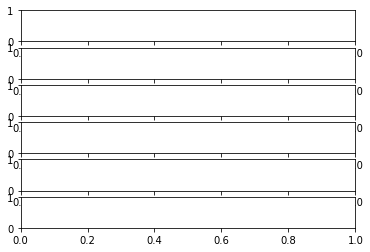

In [154]:
viz_directory = 'viz'

for col in final_foods:
    ax = final_foods.nlargest(10, col)[col].plot.bar()
    ax.set_xlabel("Food")
    ax.set_ylabel(f'Amount of {col} (grams per 100g of food)')
    ax.figure.set_alpha(0)
    ax.figure.savefig(
        fname=path.join(viz_directory, f'most_{col}_per_portion.pdf')
    )


